<h1> <center> SALES ANALYSIS 

___

<h2> OBJECTIVE


- What is the overall sales trend?

- Which are the Top 10 products by sales?

- Which are the Most Selling Products?

- Which is the most preferred Ship Mode?

- Which are the Most Profitable Category and Sub-Category?

___

<h4> IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4> IMPORTING THE DATASET

In [22]:
df = pd.read_excel('superstore_sales.xlsx')

<H3> DATA AUDIT

In [3]:
# First five rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,Kean Nguyen,Home Office,Florida,United States,US,South,...,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,24.28650,Medium,2011
1,CA-2013-118689,2013-10-03,2013-10-10,Standard Class,Kean Nguyen,Corporate,Indiana,United States,US,Central,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,22638.480,5,0.0,8399.9760,349.07000,Medium,2013
2,CA-2014-140151,2014-03-24,2014-03-26,First Class,Kean Nguyen,Consumer,Washington,United States,US,West,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,20.00054,Medium,2014
3,CA-2014-127180,2014-10-23,2014-10-25,First Class,Kean Nguyen,Home Office,New York,United States,US,East,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,45.98000,High,2014
4,CA-2014-166709,2014-11-18,2014-11-23,Standard Class,Kean Nguyen,Consumer,Delaware,United States,US,East,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,363.19000,Medium,2014


In [24]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,US-2011-152723,2011-09-26,2011-09-26,Same Day,Kean Nguyen,Corporate,Texas,United States,US,Central,...,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,0.8,-1.4016,0.09,High,2011
51286,CA-2011-112403,2011-03-31,2011-03-31,Same Day,Kean Nguyen,Consumer,Pennsylvania,United States,US,East,...,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,0.7,-0.5964,0.10,High,2011
51287,CA-2013-168361,2013-06-22,2013-06-26,Standard Class,Kean Nguyen,Corporate,Illinois,United States,US,Central,...,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,0.8,-1.3376,0.06,Medium,2013
51288,CA-2014-124114,2014-03-03,2014-03-03,Same Day,Kean Nguyen,Corporate,Texas,United States,US,Central,...,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,0.8,-0.9452,0.08,Medium,2014
51289,US-2014-102288,2014-06-20,2014-06-24,Standard Class,Kean Nguyen,Consumer,Texas,United States,US,Central,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,2014


In [25]:
# Shape of the dataset
df.shape

(51290, 21)

In [26]:
# Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [27]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
# Checking missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

<H3> Overview of Descriptive Statistics

In [28]:
df.describe().round()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,247.0,3.0,0.0,29.0,26.0,2013.0
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.0,2.0,0.0,0.0,3.0,2012.0
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.0,3.0,0.0,9.0,8.0,2013.0
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.0,5.0,0.0,37.0,24.0,2014.0
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.0,14.0,1.0,8400.0,934.0,2014.0
std,NaN,NaN,492.0,2.0,0.0,174.0,57.0,1.0


<h3> EXPLORATORY DATA ANALYSIS

- <h4> WHAT IS THE OVERALL SALES TREND?

In [29]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [30]:
df_temp = df.groupby('month_year', as_index=False)['sales'].sum()

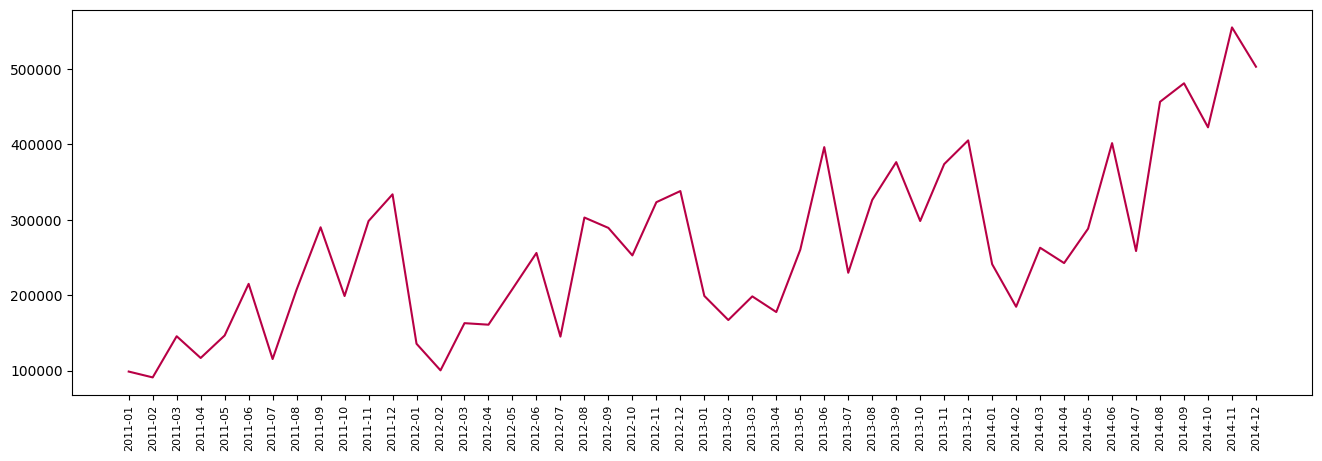

In [32]:
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

- <h4> WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [33]:
prod_sales = df.groupby('product_name')['sales'].sum().reset_index()
prod_sales.sort_values(by='sales', inplace=True, ascending=False)
top_10_prod_sales = prod_sales.head(10)
top_10_prod_sales

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,66738.3540
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


- <h4> WHICH ARE THE MOST SELLING PRODUCTS?

In [18]:
best_selling_prods = df.groupby('product_name')['quantity'].sum().reset_index()
best_selling_prods.sort_values(by='quantity', inplace=True, ascending=False)
top_10_best_selling_prods = best_selling_prods.head(10)
top_10_best_selling_prods

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


- <h4> WHAT IS THE MOST PREFERRED SHIP MODE?

C:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


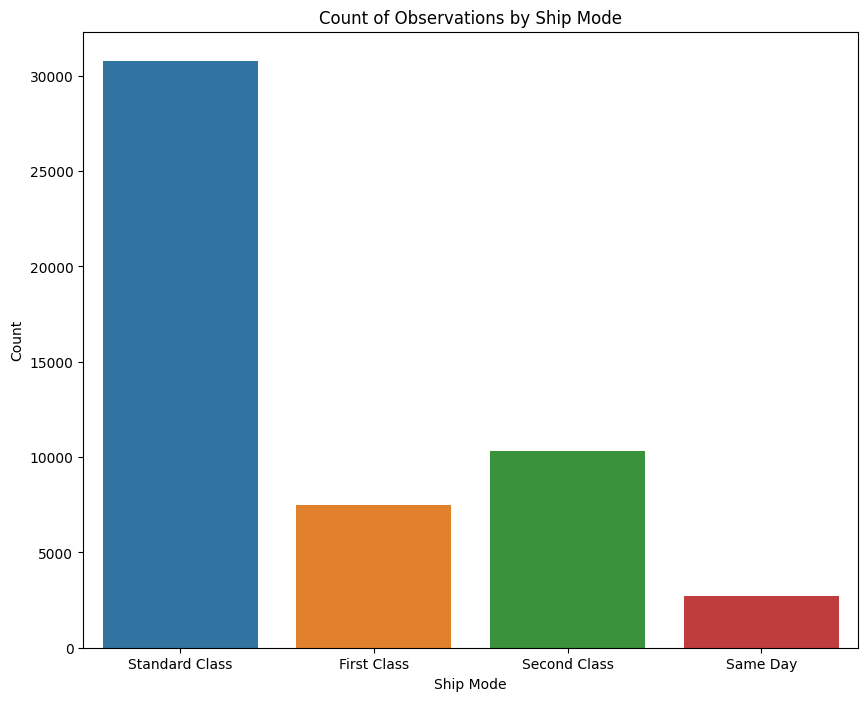

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(x='ship_mode', data=df)
plt.title('Count of Observations by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

- <h4> WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [36]:
cat_subcat = df.groupby(['category', 'sub_category'])['profit'].sum().reset_index()
cat_subcat_sorted = cat_subcat.sort_values(by=['category', 'profit'], ascending=[True, False])
cat_subcat_sorted

,category,sub_category,profit
0,Furniture,Bookcases,161924.41950
1,Furniture,Chairs,141973.79750
2,Furniture,Furnishings,46967.42550
3,Furniture,Tables,-64083.38870
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630
